# Technical Task - Data Science Internship
Question : Please complete the following task. Your answer does not need to be presented in a formal deck and thereʼs no need to spend more than a couple of hours thinking about the problem/writing up your code/methodology.
## The task:
Take a look at the following chart:

https://pageviews.wmcloud.org/?project=en.wikipedia.org&platform=all-access&agent=user&redirects=0&start=2022-01-01&end=2022-08-23&pages=Figma_(sofware) .

This is the daily pageviews to the Figma (the design sofware) wikipedia page since the start of 2022. Note that traffic to the page has weekly seasonality and a slight upwards trend. Also note that there are some days with anomalous traffic. Devise a methodology or write code to predict the daily pageviews to this page from now until the middle of next year. It doesn't have to be particularly polished - an outline will do. Justify any choices of data sets or sofware libraries considered.

### Answer: I want to test the data with different Time Series Forecasting Algorithms and choose the best performing model from them.  Initially, I would be using Prophet which is widely used library for time series forecasting, specifically designed for business time-series data. The library has built-in support for handling holidays, weekly seasonality, and trend changes.Time Series Forecasting Algorithms. Secondly I would like to use an  autoregressive integrated moving average, or ARIMA. It is a statistical analysis model that uses time series data to either better understand the data set or to predict future trends.



# Prophet
Prophet, which was released by Facebook’s Core Data Science team, is an open-source library developed by Facebook and designed for automatic forecasting of univariate time series data

In [1]:
#Use below commands to install Prophet - Time Series Analysis with Facebook Prophet
# !pip install pystan
# !pip install fbprophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
#Reading the pageviews data from the CSV to a dataframe
df = pd.read_csv('pageviews-20220101-20220823.csv')

In [4]:
#Displaying the df to analyse the data
df

,Date,Figma (software)
0,2022-01-01,632
1,2022-01-02,742
2,2022-01-03,1134
3,2022-01-04,1217
4,2022-01-05,1378
...,...,...
230,2022-08-19,1375
231,2022-08-20,1030
232,2022-08-21,1100
233,2022-08-22,1670


In [5]:
# convert the date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

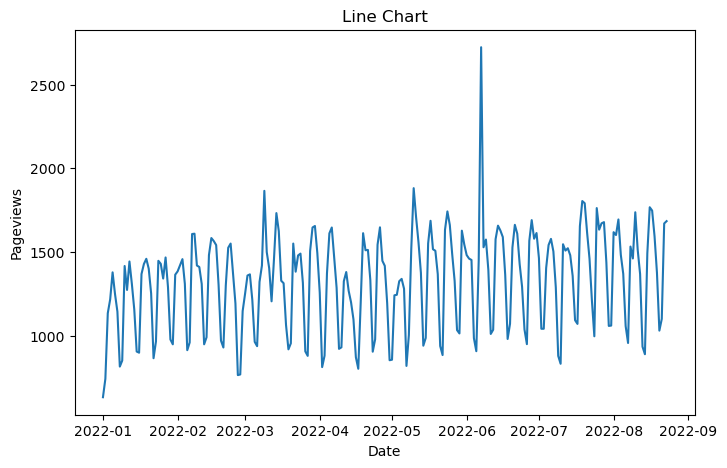

In [6]:
#Exploratory data analysis - using a line chart to visualise the data
fig = plt.figure(figsize=(8, 5), dpi=100)
plt.plot(df['Date'], df['Figma (software)'])

plt.xlabel('Date')
plt.ylabel('Pageviews')
plt.title('Line Chart')

plt.show()

In [7]:
# Facebook Prophet requires that the dates of your time series are located in a column 
# titled ds and the values of the series in a column titled y
df.rename(columns={'Date':'ds','Figma (software)': 'y'}, inplace=True)


In [8]:
# split the data into a train and test set
train_df, test_df = train_test_split(df, test_size=0.2)

In [9]:
#Creating a Prophet model and adding weekly seasonality
model = Prophet(weekly_seasonality=True)
model.fit(train_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Mean Absolute Error:  268.7051289418238
Root Mean Squared Error:  363.9392171932548


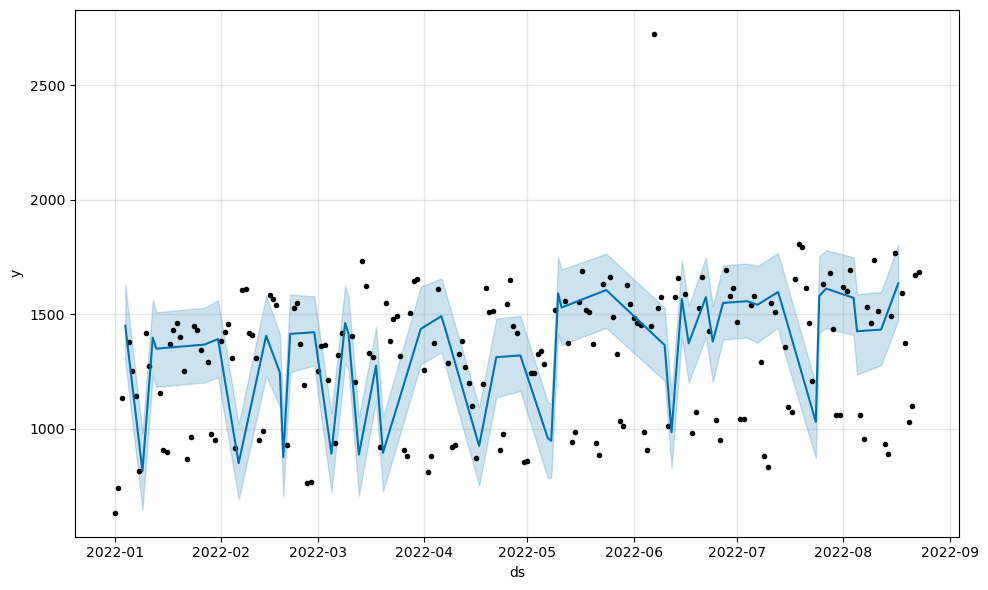

In [10]:
#Using the model to make predictions on the test set
test_predictions = model.predict(test_df)

# We are finding  MAE and RMSE the most commonly used metrics for evaluating 
# the performance of the model

mae = mean_absolute_error(test_predictions['yhat'], test_df['y'])
rmse = mean_squared_error(test_predictions['yhat'], test_df['y']) ** 0.5

print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)

#Ploting the forecast for test predictions
model.plot(test_predictions)

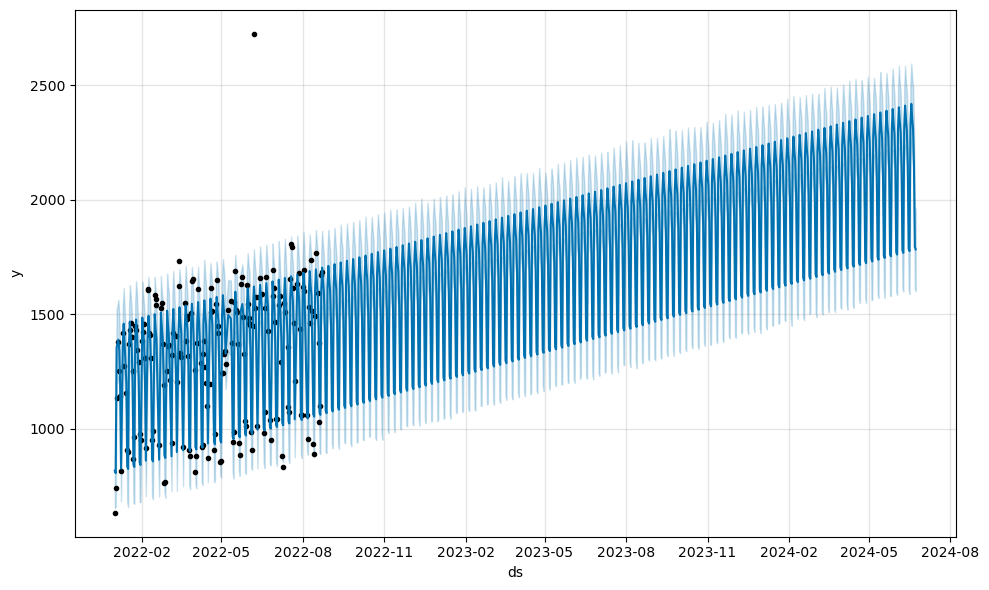

In [11]:
# create a dataframe to hold future predictions
'''
Provinding periods = 670(days),because the task asked to predict the daily pageviews to this page from 
now(01/2023) until the middle of next year i.e; mid of 2024 (06/2024)
'''
future = model.make_future_dataframe(periods=670)
# make predictions
forecast = model.predict(future)
# plotting the forecast
model.plot(forecast)

## ARIMA
In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average model is a generalization of an autoregressive moving average model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series

In [12]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

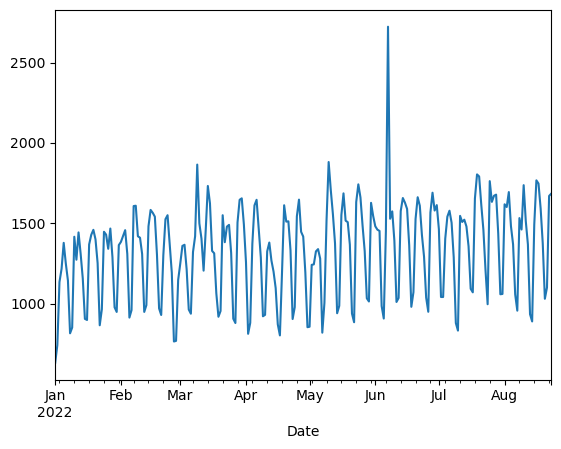

In [14]:
#Reading the pageviews data from the CSV to a dataframe
df2 = pd.read_csv('pageviews-20220101-20220823.csv')
# convert the date column to a datetime object
df2['Date'] = pd.to_datetime(df2['Date'])
# Setting the date column as the index
df2.set_index('Date', inplace=True)
# Renaming the column with pageviews data as 'y'
df2.rename(columns={'Figma (software)': 'y'}, inplace=True)
# visualize the data
df2.y.plot()
plt.show()

In [15]:
# Checking for stationarity of the data
#The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process 
#in the presence of serial correlation
result = adfuller(df2.y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.779780
p-value: 0.061221
Critical Values:
	1%: -3.460567372610299
	5%: -2.874829809033386
	10%: -2.573853225954421


##### The ADF Statistic is not far from the critical values and but the p-value is greater than the threshold (0.05). Thus, we can conclude that the time series is not stationary.

In [16]:
# We can difference the data to make it to stationary
df2['y_diff'] = df2.y - df2.y.shift()
df2 = df2.dropna()
result = adfuller(df2.y_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -8.981848
p-value: 0.000000
Critical Values:
	1%: -3.4602906385073884
	5%: -2.874708679520702
	10%: -2.573788599127782


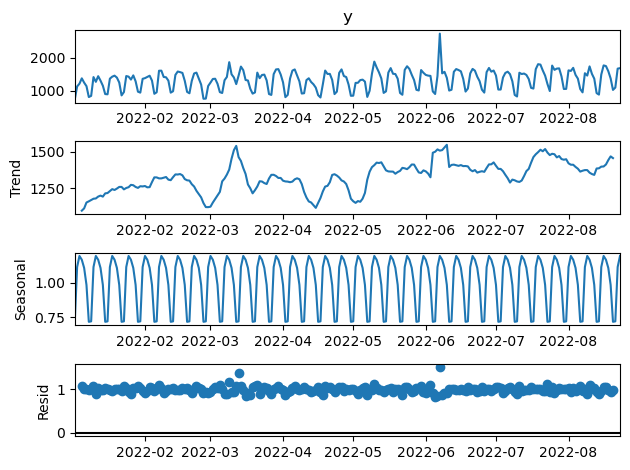

In [17]:
#Decompose the data to identify the trend, seasonal, and residual components
decomposition = seasonal_decompose(df2.y, model='multiplicative')
decomposition.plot()
plt.show()

In [19]:
# split the data into train and test sets
train, test = train_test_split(df2, test_size=0.2, shuffle=False)

# fit the ARIMA model
model = ARIMA(train.y_diff, order=(2,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

#Hide the warnings from notebook
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

                             ARIMA Model Results                              
Dep. Variable:               D.y_diff   No. Observations:                  186
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1273.739
Method:                       css-mle   S.D. of innovations            217.054
Date:                Sun, 15 Jan 2023   AIC                           2559.478
Time:                        01:31:28   BIC                           2578.833
Sample:                    01-03-2022   HQIC                          2567.321
                         - 07-07-2022                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.017     -0.055      0.956      -0.035       0.033
ar.L1.D.y_diff     0.7088      0.064     11.053      0.000       0.583       0.835
ar.L2.D.y_diff    -0.4990      0.064

In [20]:
# make predictions
predictions = model_fit.predict(start=test.index[0], end=test.index[-1], typ='levels')
predictions = predictions + train.y.iloc[-1]

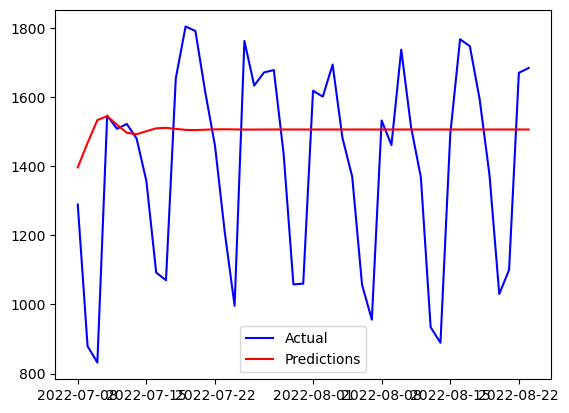

In [21]:
# plot the predictions
plt.plot(test.y,'b', label='Actual')
plt.plot(predictions,'r', label='Predictions')
plt.legend()
plt.show()

In [22]:
# evaluating the performance of the model
mae = mean_absolute_error(test.y, predictions)
rmse = mean_squared_error(test.y, predictions)
print('MAE: %f' % mae)
print('RMSE: %f' % rmse)

MAE: 233.650664
RMSE: 91572.104379


##### While observing the ARIMA model,  its evident that its performance metrics and predictions graph is less significant than the latter model i.e; Prophet

## Conclusion
I have tested the data with different Time Series Forecasting Algorithms such as Prophet and ARIMA model. Based on the performance results, I have found that Prophet is the best performing model. I wanted to try LSTM model (Deep learning) as well, but since the data provided is less, I assume it will result in worst performance.

I have considered sticking with the best performing model and improving it further by tuning the parameters and testing it with more data. If I wanted to try LSTM model, I would consider obtaining more data before training the LSTM model.